In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns

# Question 1 

For this question, you only need to do programming for Part 1.1 - 1.6. You will only be asked to provide answers in Part 1.7. 

In [3]:
PATH_TO_Q1_DATA = 'data/HW3_Q1_DATA.csv'
df_original = pd.read_csv(PATH_TO_Q1_DATA)

### Data Exploration

In [4]:
df_original.shape

(121913, 19)

In [5]:
df_original.head()

,Sex,Intubated,Pneumonia,Age,Pregnant,Diabetes,COPD,Asthma,Immunocompromised,Hypertension,Other_Disease,Cardiovascular_disease,Obesity,Renal_disease,Smoker,Exposure_to_others_with_COVID,Has_COVID,ICU,Died
0,F,N,N,54,N,N,N,N,N,N,N,N,Y,N,N,NaN,Y,N,N
1,M,N,Y,30,NaN,N,N,N,N,N,N,N,N,N,N,NaN,Y,N,N
2,F,N,N,60,N,Y,N,N,N,Y,N,Y,N,N,N,NaN,Y,N,Y
3,M,N,Y,47,NaN,Y,N,N,N,N,N,N,N,N,N,NaN,Y,Y,Y
4,M,N,N,63,NaN,N,N,N,N,Y,N,N,N,N,N,NaN,Y,N,N


In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121913 entries, 0 to 121912
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Sex                            121913 non-null  object
 1   Intubated                      121789 non-null  object
 2   Pneumonia                      121912 non-null  object
 3   Age                            121913 non-null  int64 
 4   Pregnant                       48676 non-null   object
 5   Diabetes                       121244 non-null  object
 6   COPD                           121329 non-null  object
 7   Asthma                         121328 non-null  object
 8   Immunocompromised              121233 non-null  object
 9   Hypertension                   121304 non-null  object
 10  Other_Disease                  120872 non-null  object
 11  Cardiovascular_disease         121267 non-null  object
 12  Obesity                        121279 non-nu

In [7]:
df_original['Died'].value_counts()

N    89357
Y    32556
Name: Died, dtype: int64

### Encode data

In [8]:
# convert categorical data to numerical values
# drop one of each of the binary categories because it is not necessary (all info is encoded by one column)
df_encoded=pd.get_dummies(df_original, drop_first=True,dummy_na=True)
print(df_encoded.shape)

(121913, 38)


In [174]:
# def encode_data_1(df):
#     '''
#     Encodes categorical data after dropping records with missing values, then returns a DataFrame of the result.
#     '''
    
#     # drop records with missing values
#     df=df_original.dropna()
#     print(df.shape)
    
#     # convert categorical data to numerical values
#     # drop one of each of the binary categories because it is not necessary (all info is encoded by one column)
#     df=pd.get_dummies(df, drop_first=True)
#     print(df.shape)

#     return df

In [175]:
# df_encoding1 = encode_data_1(df_original)

(23158, 19)
(23158, 19)


In [9]:
df_encoded.head()

,Age,Sex_M,Sex_nan,Intubated_Y,Intubated_nan,Pneumonia_Y,Pneumonia_nan,Pregnant_Y,Pregnant_nan,Diabetes_Y,...,Smoker_nan,Exposure_to_others_with_COVID_Y,Exposure_to_others_with_COVID_nan,Has_COVID_Pending,Has_COVID_Y,Has_COVID_nan,ICU_Y,ICU_nan,Died_Y,Died_nan
0,54,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,30,1,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2,60,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,47,1,0,0,0,1,0,0,1,1,...,0,0,1,0,1,0,1,0,1,0
4,63,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [11]:
df_encoded.drop('Age',axis='columns').sum(axis='rows')

Sex_M                                73071
Sex_nan                                  0
Intubated_Y                           9965
Intubated_nan                          124
Pneumonia_Y                          73747
Pneumonia_nan                            1
Pregnant_Y                            1071
Pregnant_nan                         73237
Diabetes_Y                           35481
Diabetes_nan                           669
COPD_Y                                5493
COPD_nan                               584
Asthma_Y                              3144
Asthma_nan                             585
Immunocompromised_Y                   4726
Immunocompromised_nan                  680
Hypertension_Y                       40344
Hypertension_nan                       609
Other_Disease_Y                       7287
Other_Disease_nan                     1041
Cardiovascular_disease_Y              6305
Cardiovascular_disease_nan             646
Obesity_Y                            25127
Obesity_nan

### Visualize Data

In [12]:
# plot data so I can see what shape it takes
y = df_encoded['Died_Y']
print(y.shape)
X = df_encoded.drop('Died_Y',axis='columns')
print(X.shape)

(121913,)
(121913, 37)


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

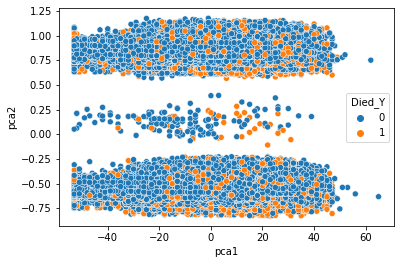

In [13]:
from sklearn.decomposition import PCA

# use PCA to visualize data
pca = PCA(n_components=2).fit_transform(df_encoded.drop('Died_Y',axis='columns')) 
df_pca_plot = pd.DataFrame(pca, columns=['pca1','pca2'])
df_pca_plot_concat = df_pca_plot.assign(Died_Y=y.values)
sns.scatterplot(x='pca1', y='pca2', data=df_pca_plot_concat, legend='full',hue='Died_Y')

### DataFrame to store classifier metric results for all tests

In [14]:
# dataframe to collect results of all tests
df_results = pd.DataFrame(
    columns=['Section',
             'Description',
             'Accuracy',
             'Sensitivity',
             'Specificity',
             'Pos_Predictive_Val',
             'Neg_Predictive_Val',
             'F1_Score',
             'Matthew_Corr_Coef',
             'AUC'
            ]).astype(
    dtype= {'Section':'int64',
            'Description':'object',
            'Accuracy':'float64',
            'Sensitivity':'float64',
             'Specificity':'float64',
             'Pos_Predictive_Val':'float64',
             'Neg_Predictive_Val':'float64',
             'F1_Score':'float64',
             'Matthew_Corr_Coef':'float64',
             'AUC':'float64'
           })

## Part 1.1 Select features and train classifiers

### Part 1.1 Work 

In [15]:
# TODO: 
#   Step 1: Select and apply a filter-based or wrapper-based feature selection method to the data.
#   Step 2: Train a classifier using the selected features. Use 10-fold cross validation.

# Tip: 
#   1. You may find the filter-based or wrapper-based methods you used in HW2 useful. 

#   2. Scikit-learn implement many classifiers, see the comparisons of their 
#   performance and introductions here:
#   https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

#   3. Scikit-learn also implement classifiers with built-in cross validations,
#   for example: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html

#### Select classifier that can handle working with missing data
Use RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split


def run_crossfold_recursive_feature_elimination(X,y):
#     clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf = DecisionTreeClassifier()
    rfecv = RFECV(estimator=clf, step=1, cv=10,scoring='neg_mean_squared_error',n_jobs=3)
    return rfecv.fit(X, y)

def get_feature_list(X, support):
    features = list()
    for i,val in enumerate(support):
        if val:
            features.append(X.columns[i])      
    return features

def build_X_from_features(X, list_features):
    return X.loc[:][list_features]

def run_random_forest_classifier(X,y):
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    return rfecv.fit(X, y)

def run_crossfold_validation(clf,X,y,k):
    scores = cross_val_score(clf, X, y, cv=k)
    
    # get average score
    return scores.mean()

In [28]:
%%time

# select data
X_1_1 = df_encoded.drop(['Died_Y','Died_nan'],axis='columns')
y_1_1 = df_encoded.loc[:]['Died_Y']
print(X_1_1.shape)
print(y_1_1.shape)

(121913, 36)
(121913,)
CPU times: user 8.12 ms, sys: 3.1 ms, total: 11.2 ms
Wall time: 9.75 ms


In [ ]:
# select features
X_train_1_1,y_train_1_1,X_test_1_1,y_test_1_1 = train_test_split(X_1_1,y_1_1,test_size=0.3)

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train_1_1, y_train_1_1)

# # feature selection
# rfe_1_1 = run_crossfold_recursive_feature_elimination(X_1_1,y_1_1)
# features_1_1 = get_feature_list(X_1_1,rfe_1_1.support_)

In [ ]:
features_1_1

#### Define wrapper-based feature selection method and classifier
DecisionTree reference: https://www.dezyre.com/recipes/do-recursive-feature-elimination-in-python-decisiontreeregressor

In [182]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

# # version 1 takes a long time
# def perform_feature_selection_wrapper(X,y):
#     svc = SVC(kernel="linear")
#     rfecv = RFECV(estimator=svc, step=1, cv=5,scoring='accuracy',n_jobs=3)
#     return rfecv.fit(X, y)

# # version 2 takes too long
# def perform_feature_selection_wrapper_2(X,y):
#     svc = SVC(gamma=2, C=1)
#     rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(10),scoring='accuracy',n_jobs=3)
#     return rfecv.fit(X, y)

# version 3 is fast
def perform_feature_selection_wrapper_3(X,y):
    dtree = DecisionTreeClassifier(random_state=0)
    rfecv = RFECV(estimator=dtree, step=1, cv=10,scoring='neg_mean_squared_error',n_jobs=3)
    return rfecv.fit(X, y)
  
def get_feature_list(X, support):
    features = list()
    for i,val in enumerate(support):
        if val:
            features.append(X.columns[i]) # feature was selected by wrapper method
        
    return features

In [183]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

def build_X_from_features(X, list_features):
    return X.loc[:][list_features]

def train_classifier(X,y,k):
    clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=k)
    return clf.fit(X, y)

# def train_classifier_3(X,y,k):
#     clf = SVC(gamma=2, C=1)
#     scores = cross_validate(clf, X, y, cv=k,return_estimator=True)
#     return scores

#### Separate encoded data into features and target

In [184]:
y_1_1 = df_encoding1.loc[:]['Died_Y']
print(y_1_1.shape)
X_1_1 = df_encoding1.drop('Died_Y',axis='columns')
print(X_1_1.shape)

(23158,)
(23158, 18)


In [185]:
X_1_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23158 entries, 8 to 121906
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              23158 non-null  int64
 1   Intubated_Y                      23158 non-null  uint8
 2   Pneumonia_Y                      23158 non-null  uint8
 3   Pregnant_Y                       23158 non-null  uint8
 4   Diabetes_Y                       23158 non-null  uint8
 5   COPD_Y                           23158 non-null  uint8
 6   Asthma_Y                         23158 non-null  uint8
 7   Immunocompromised_Y              23158 non-null  uint8
 8   Hypertension_Y                   23158 non-null  uint8
 9   Other_Disease_Y                  23158 non-null  uint8
 10  Cardiovascular_disease_Y         23158 non-null  uint8
 11  Obesity_Y                        23158 non-null  uint8
 12  Renal_disease_Y                  23158 non-nu

#### Perform feature selection and classification

In [186]:
# %%time 
# # runtime - 3.4 s (1000 records, 10 fold, 3 cores)
# # runtime - 6 min (10000 records, 10 fold, 3 cores)
# # runtime - 6 min (23158 records, 10 fold, 3 cores)

# # feature selection
# rfecv = perform_feature_selection_wrapper(X_1_1,y_1_1)
# features_wrapper = get_feature_list(X_1_1,rfecv.support_)

In [187]:
# features_wrapper

In [188]:
%%time

# runtime - 1s (23158 records, 10 fold, 3 cores)

rfecv3 = perform_feature_selection_wrapper_3(X_1_1,y_1_1)
features_wrapper3 = get_feature_list(X_1_1,rfecv3.support_)

CPU times: user 411 ms, sys: 36.2 ms, total: 448 ms
Wall time: 3.12 s


In [189]:
features_wrapper3

['Age', 'Intubated_Y']

In [190]:
%%time

# classification
X_1_1_classifier = build_X_from_features(X_1_1,features_wrapper3)
clf_1_1 = train_classifier(X_1_1_classifier,y_1_1,10)

CPU times: user 912 ms, sys: 15.2 ms, total: 927 ms
Wall time: 245 ms


#### Calculate metrics and add row to results DataFrame
- Accuracy
- Sensitivity & Specificity
- The positive and negative predictive values 
- F1-score
- The Matthews Correlation Coefficient
- AUC (Area under the ROC curve)

In [191]:
from sklearn.metrics import confusion_matrix

def get_confusion_matrix(y_true,y_predict):
    '''
    Calculates the confusion matrix for a given X,y and classifier.
    '''
    # confusion matrix
    cm = confusion_matrix(y_true, y_predict)
    tn, fp, fn, tp = cm.ravel()
    
    return cm


def get_y_score_from_decision_function(X,clf):
    '''Uses decision_function to calculate y_scores because classifier doesn't have predict_prob().
    '''
    return clf.decision_function(X)

def get_y_score_from_predict_proba(X,clf):
    return clf.predict_proba(X)[:,1]


def get_y_score(X,y,clf,score_func):
    if score_func == "decision":
        return get_y_score_from_decision_function(X,clf)
    elif score_func == "proba":
        return get_y_score_from_predict_proba(X,clf)

In [192]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

def calc_classifier_metrics(cm, y_true, y_predict, y_score):
    
    tn, fp, fn, tp = cm.ravel()
#     print('TN:',tn)
#     print('FP:',fp)
#     print('FN:',fn)
#     print('TP:',tp)
#     print('TOTAL:',tp + tn + fp + fn)
    
    # accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # sensitivity
    sen = tp / (tp + fn)
    
    # specificity
    spec = tn / (tn + fp)
    
    # precision
    prec = tn / (tn + fp)
    
    # positive predictive value
    ppv = tp / (fp + tp) # ?? check correctness
    
    # negative predictive value
    npv = tn / (fn + tn)
    
    # f1 score
    f1 = 2 * (prec * sen) / (prec + sen) 
    
    # matthew correlation coefficient
    mcc = matthews_corrcoef(y_true,y_predict)
    
    # area Under the receiver (AUC)
    auc = roc_auc_score(y_true, y_score)
    
    # return numpy array  
    metrics = [acc,sen,spec,ppv,npv,f1,mcc,auc]
    return metrics

In [193]:
def add_row(df, section, description, metrics):
    
    data = [section,description] + metrics 
    new_row = pd.Series(data, index = df.columns)
    return df.append(new_row,ignore_index=True)

def add_metrics_to_table(df, section, description, X, y, clf, score_func):
    
    # for validation purposes
#     print(clf.score(X,y),'\n')
    
    # calculate confusion matrix
    y_predict = clf.predict(X)
    y_real = y
    cm = get_confusion_matrix(y_real,y_predict)
    
    # calculate y score
    y_score = get_y_score(X,y,clf, score_func)
    
    # calculate metrics
    metrics = calc_classifier_metrics(cm,y_real,y_predict,y_score)
#     print('\n',metrics)
    
    # add row to results DataFrame
    return add_row(df, section, description, metrics)

In [194]:
df_results = add_metrics_to_table(df_results, 1, "Wrapper", X_1_1_classifier, y_1_1, clf_1_1,"decision")

In [195]:
df_results

,Section,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.845626,0.30199,0.959818,0.612204,0.867485,0.459429,0.354382,0.766171


### Part 1.2 Work 

In [196]:
# TODO: 
#   Step 1: Select a learning algorithm that performs embedded feature selection. 
#   Step 2: Train a classifier using the selected features. Use 10-fold cross validation.

# Tip: 
#   1. Scikit-learn implement many classifiers, see the comparisons of their 
#   performance and introductions here:
#   https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

#   2. Scikit-learn also implement classifiers with built-in cross validations,
#   for example: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html

#### Define embedded feature selection method

In [197]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LassoCV

def perform_feature_selection_embedded(X,y):
    sel = SelectFromModel(RandomForestClassifier())
    return sel.fit(X, y)

#### Perform feature selection and classification

In [198]:
from sklearn.model_selection import train_test_split

# use same data from 1.1
X_1_2 = X_1_1
y_1_2 = y_1_1

# split data
X_train_embedded,X_test_embedded,y_train_embedded,y_test_embedded = train_test_split(X_1_2,
                                                                                     y_1_2,
                                                                                     test_size=0.25)

In [199]:
%%time

# feature selection
rfc = perform_feature_selection_embedded(X_train_embedded, y_train_embedded)
features_embedded = get_feature_list(X_train_embedded,rfc.get_support())

CPU times: user 1.34 s, sys: 41.4 ms, total: 1.38 s
Wall time: 972 ms


In [200]:
features_embedded

['Age', 'Intubated_Y', 'Has_COVID_Y']

In [201]:
%%time

# classification
X_1_2_classifier = build_X_from_features(X_1_2,features_embedded)
clf_1_2 = train_classifier(X_1_2_classifier,y_1_2,10)

CPU times: user 931 ms, sys: 12.9 ms, total: 944 ms
Wall time: 250 ms


#### Calculate metrics and add row to results DataFrame

In [202]:
df_results = add_metrics_to_table(df_results, 2, "Embedded", X_1_2_classifier, y_1_2, clf_1_2,"decision")

In [203]:
df_results

,Section,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.845626,0.301990,0.959818,0.612204,0.867485,0.459429,0.354382,0.766171
1,2,Embedded,0.848994,0.290299,0.966350,0.644395,0.866351,0.446473,0.362053,0.800752


### Part 1.3 Work 

In [204]:
# TODO: 
#   Step 1: Select and apply a data imputation method to handle the missing data.
#   Step 2: Apply the  wrapper based feature selection method you used in part 1.1.
#   Step 3: Train a classifier using the selected features. Use the same classifier you used in part 1.1. Use 10-fold cross validation.

# Tip: 
#   1. Sciki-learn implements different imputation methods. Take a look at https://scikit-learn.org/stable/modules/impute.html
#   and use the one you think most appropriate.

#### Impute missing values

In [205]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="most_frequent")

In [206]:
ndarray_imputed = imp.fit_transform(df_original)
ndarray_imputed.shape

(121913, 19)

In [207]:
# convert back to DataFrame
df_imputed = pd.DataFrame(ndarray_imputed, columns=df_original.columns)
df_imputed.head()

,Sex,Intubated,Pneumonia,Age,Pregnant,Diabetes,COPD,Asthma,Immunocompromised,Hypertension,Other_Disease,Cardiovascular_disease,Obesity,Renal_disease,Smoker,Exposure_to_others_with_COVID,Has_COVID,ICU,Died
0,F,N,N,54,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N
1,M,N,Y,30,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N
2,F,N,N,60,N,Y,N,N,N,Y,N,Y,N,N,N,N,Y,N,Y
3,M,N,Y,47,N,Y,N,N,N,N,N,N,N,N,N,N,Y,Y,Y
4,M,N,N,63,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N


In [208]:
df_original.head()

,Sex,Intubated,Pneumonia,Age,Pregnant,Diabetes,COPD,Asthma,Immunocompromised,Hypertension,Other_Disease,Cardiovascular_disease,Obesity,Renal_disease,Smoker,Exposure_to_others_with_COVID,Has_COVID,ICU,Died
0,F,N,N,54,N,N,N,N,N,N,N,N,Y,N,N,NaN,Y,N,N
1,M,N,Y,30,NaN,N,N,N,N,N,N,N,N,N,N,NaN,Y,N,N
2,F,N,N,60,N,Y,N,N,N,Y,N,Y,N,N,N,NaN,Y,N,Y
3,M,N,Y,47,NaN,Y,N,N,N,N,N,N,N,N,N,NaN,Y,Y,Y
4,M,N,N,63,NaN,N,N,N,N,Y,N,N,N,N,N,NaN,Y,N,N


In [209]:
# convert Age to int64 data type so get_dummies() doesn't treat it as a category
df_imputed = df_imputed.astype({'Age': 'int64'})

In [210]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121913 entries, 0 to 121912
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Sex                            121913 non-null  object
 1   Intubated                      121913 non-null  object
 2   Pneumonia                      121913 non-null  object
 3   Age                            121913 non-null  int64 
 4   Pregnant                       121913 non-null  object
 5   Diabetes                       121913 non-null  object
 6   COPD                           121913 non-null  object
 7   Asthma                         121913 non-null  object
 8   Immunocompromised              121913 non-null  object
 9   Hypertension                   121913 non-null  object
 10  Other_Disease                  121913 non-null  object
 11  Cardiovascular_disease         121913 non-null  object
 12  Obesity                        121913 non-nu

#### Convert categorical data to numerical

In [211]:
def encode_data_2(df):
    '''
    Encodes categorical data then returns a DataFrame of the result.
    '''
    
    # convert categorical data to numerical values
    # drop one of each of the binary categories because it is not necessary (all info is encoded by one column)
    df=pd.get_dummies(df, drop_first=True)

    return df

In [212]:
df_imputed_encoded = encode_data_2(df_imputed)
df_imputed_encoded.shape

(121913, 20)

In [213]:
df_imputed_encoded.head()

,Age,Sex_M,Intubated_Y,Pneumonia_Y,Pregnant_Y,Diabetes_Y,COPD_Y,Asthma_Y,Immunocompromised_Y,Hypertension_Y,Other_Disease_Y,Cardiovascular_disease_Y,Obesity_Y,Renal_disease_Y,Smoker_Y,Exposure_to_others_with_COVID_Y,Has_COVID_Pending,Has_COVID_Y,ICU_Y,Died_Y
0,54,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,30,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,60,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1
3,47,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,63,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [214]:
# separate into features and target 
X_1_3 = df_imputed_encoded.drop('Died_Y', axis='columns')
y_1_3 = df_imputed_encoded['Died_Y']
print(X_1_3.shape)
print(y_1_3.shape)

(121913, 19)
(121913,)


#### Apply wrapper based feature selection

In [215]:
%%time 
# runtime - 23 min (30000 records, 10 fold, 3 cores) with perform_feature_selection_wrapper_1
# runtime - 13 s (120k records, 10 fold, 3 cores) with perform_feature_selection_wrapper_3

# feature selection
rfecv_imputed = perform_feature_selection_wrapper_3(X_1_3,y_1_3)
features_wrapper_imputed = get_feature_list(X_1_3,rfecv_imputed.support_)

CPU times: user 2.36 s, sys: 54.2 ms, total: 2.42 s
Wall time: 13.1 s


In [216]:
features_wrapper_imputed

['Age', 'Intubated_Y', 'Pneumonia_Y', 'Has_COVID_Y']

#### Train classifier

In [217]:
%%time

# classification
X_1_3_classifier = build_X_from_features(X_1_3,features_wrapper_imputed)
clf_1_3 = train_classifier(X_1_3_classifier,y_1_3,10)

CPU times: user 3.88 s, sys: 85.7 ms, total: 3.96 s
Wall time: 1.04 s


#### Add classifier metrics to results DataFrame

In [218]:
df_results = add_metrics_to_table(df_results, 3, "Wrapper Imputed", X_1_3_classifier, y_1_3, clf_1_3,"decision")

In [219]:
df_results

,Section,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.845626,0.301990,0.959818,0.612204,0.867485,0.459429,0.354382,0.766171
1,2,Embedded,0.848994,0.290299,0.966350,0.644395,0.866351,0.446473,0.362053,0.800752
2,3,Wrapper Imputed,0.753824,0.170445,0.966371,0.648702,0.761757,0.289779,0.236975,0.748270


### Part 1.4 Work 

In [220]:
# TODO: 
#   Step 1: Apply a data imputation method to eliminate any missing values in the data. Use the same method you used in part 1.3. 
#   Step 2: Train a classifier. Use the same classifier you used in part 1.2. Use 10-fold cross validation.

#### Perform feature selection and classification

In [221]:
# use the same imputed data as in 1.3
X_1_4=X_1_3
y_1_4=y_1_3

# split data
X_train_embedded_i,X_test_embedded_i,y_train_embedded_i,y_test_embedded_i = train_test_split(
    X_1_4,
    y_1_4,
    test_size=0.25)

In [222]:
%%time

# feature selection
rfc = perform_feature_selection_embedded(X_train_embedded_i, y_train_embedded_i)
features_embedded_imputed = get_feature_list(X_1_4,rfc.get_support())

CPU times: user 5.8 s, sys: 94.7 ms, total: 5.89 s
Wall time: 5.84 s


In [223]:
features_embedded_imputed

['Age', 'Intubated_Y', 'Has_COVID_Y']

In [224]:
%%time

# classification
X_1_4_classifier = build_X_from_features(X_1_4,features_embedded_imputed)
clf_1_4 = train_classifier(X_1_4_classifier,y_1_4,10)

CPU times: user 3.96 s, sys: 102 ms, total: 4.06 s
Wall time: 1.07 s


#### Calculate metrics and add row to results DataFrame

In [225]:
df_results = add_metrics_to_table(df_results, 4,"Embedded Imputed",X_1_4_classifier,y_1_4,clf_1_4,"decision")

In [226]:
df_results

,Section,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.845626,0.301990,0.959818,0.612204,0.867485,0.459429,0.354382,0.766171
1,2,Embedded,0.848994,0.290299,0.966350,0.644395,0.866351,0.446473,0.362053,0.800752
2,3,Wrapper Imputed,0.753824,0.170445,0.966371,0.648702,0.761757,0.289779,0.236975,0.748270
3,4,Embedded Imputed,0.752446,0.158527,0.968833,0.649509,0.759623,0.272470,0.228270,0.740902


### Part 1.5 Work 

In [227]:
# TODO: 
#   Step 1: Apply a data imputation method to eliminate any missing values in the data. Use the same method you used in parts 1.3 & 1.4. 
#   Step 2: Select a learning algorithm that performs cost-sensitive learning. 
#   Step 3: Adjust the costs until you find a classifier that maximizes the F1-score, subject to the constraint that it achieves 95% sensitivity for the label ‘Y’.  Use 10-fold cross validation.

# Tip: 
#   1. F1-score: https://en.wikipedia.org/wiki/F1_score
#   2. Scikit-learn supports extending the classifiers to cost-sensitive learning.
#   Take a look at this tutorial: https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/

#### Apply same data imputation method

In [228]:
# use the same imputed data as in 1.3
X_1_5 = X_1_4
y_1_5 = y_1_4

In [229]:
# check label counts to see imbalance
y_1_5.value_counts()

0    89357
1    32556
Name: Died_Y, dtype: int64

#### Feature Selection?

In [230]:
##?? are we performing feature selection here
X_1_5_classifier = X_1_5

#### Find correct weights for cost-sensitive classifier

In [231]:
def train_cost_sensitive_classifier(X,y,k,weights):
    clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=k, class_weight=weights)
    return clf.fit(X, y)

In [232]:
def calc_sensitivity_and_f1(cm):
    
    tn, fp, fn, tp = cm.ravel()
    
    # sensitivity
    sen = tp / (tp + fn)
    
    # specificity
    spec = tn / (tn + fp)
    
    # precision
    prec = tn / (tn + fp)
    
    # f1 score
    f1 = 2 * (prec * sen) / (prec + sen) 
    
    return (sen,f1)

In [233]:
def run_balanced_case(X,y):
    # base case
    clf = train_cost_sensitive_classifier(X,y,10,'balanced')

    # calculate confusion matrix
    y_predict = clf.predict(X)
    y_real = y
    cm = get_confusion_matrix(y_real,y_predict)

    # calculate metrics
    sen,f1 = calc_sensitivity_and_f1(cm)
    print('\nSensitivity:',sen)
    print('F-score:',f1)
    
run_balanced_case(X_1_5_classifier,y_1_5)


Sensitivity: 0.7253655240201499
F-score: 0.6901169345005495


In [234]:
# after zero weight of 0.2, results degraded rapidly
def find_zero_weight_to_maximize_f1(X,y):
    
    zero_weight=0.0
    max_f1=0.0
    zero_weight_for_max=0.0
    while zero_weight < 0.2:
        zero_weight = round(zero_weight + 0.005,3)
        one_weight = round(1 - zero_weight,3)
        
        print(zero_weight,one_weight)
        clf = train_cost_sensitive_classifier(X,y,10,{0:zero_weight, 1:one_weight})

        # calculate confusion matrix
        y_predict = clf.predict(X)
        y_real = y
        cm = get_confusion_matrix(y_real,y_predict)

        # calculate metrics
        sen,f1 = calc_sensitivity_and_f1(cm)
        if sen >= 0.95 and f1 > max_f1:
            max_f1 = f1
            zero_weight_for_max=zero_weight
            
    print('max_f1:',max_f1)
    print('zero_weight for max_f1:',zero_weight_for_max)
    return zero_weight_for_max

In [235]:
%%time

best_zero = find_zero_weight_to_maximize_f1(X_1_5_classifier,y_1_5)
best_one = round(1-best_zero,3)
print()
print(best_zero)
print(best_one)

0.005 0.995
0.01 0.99
0.015 0.985
0.02 0.98
0.025 0.975
0.03 0.97
0.035 0.965
0.04 0.96
0.045 0.955
0.05 0.95
0.055 0.945
0.06 0.94
0.065 0.935
0.07 0.93
0.075 0.925
0.08 0.92
0.085 0.915
0.09 0.91
0.095 0.905
0.1 0.9
0.105 0.895
0.11 0.89
0.115 0.885
0.12 0.88
0.125 0.875
0.13 0.87
0.135 0.865
0.14 0.86
0.145 0.855
0.15 0.85
0.155 0.845
0.16 0.84
0.165 0.835
0.17 0.83
0.175 0.825
0.18 0.82
0.185 0.815
0.19 0.81
0.195 0.805
0.2 0.8
max_f1: 0.4275058176416951
zero_weight for max_f1: 0.115

0.115
0.885
CPU times: user 6min 20s, sys: 24.5 s, total: 6min 45s
Wall time: 1min 49s


In [236]:
# run classifier using best weights
weights = {0:best_zero, 1:best_one}
clf_1_5 = train_cost_sensitive_classifier(X_1_5_classifier,y_1_5,10,weights)

#### Calculate metrics for best classifier and add row to results DataFrame

In [237]:
df_results = add_metrics_to_table(df_results,5,"Cost Sensitive Imputed",X_1_5_classifier,y_1_5,clf_1_5,"decision")

In [238]:
df_results

,Section,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.845626,0.301990,0.959818,0.612204,0.867485,0.459429,0.354382,0.766171
1,2,Embedded,0.848994,0.290299,0.966350,0.644395,0.866351,0.446473,0.362053,0.800752
2,3,Wrapper Imputed,0.753824,0.170445,0.966371,0.648702,0.761757,0.289779,0.236975,0.748270
3,4,Embedded Imputed,0.752446,0.158527,0.968833,0.649509,0.759623,0.272470,0.228270,0.740902
4,5,Cost Sensitive Imputed,0.456801,0.954632,0.275423,0.324331,0.943384,0.427506,0.248172,0.760590


### Part 1.6 Work 

In [239]:
# TODO: 
#   Step 1: Implement a function calculating the weighted average F1-score, following 
#       the steps in the homework problem statement.
#   Step 2: Find a classifier that achieves a weighted average F1-score of at least 0.74 using 10-fold cross validation.

# Tip: 
#   1. F1-score: https://en.wikipedia.org/wiki/F1_score
#   2. Scikit-learn supports extending the classifiers to cost-sensitive learning.
#   Take a look at this tutorial: https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/



#### Define Weighted F1 function

In [240]:
def weighted_f1(cm):
    '''
    Calculates a weighted F1-score using given confusion matrix cm. 
    '''
    
    tn, fp, fn, tp = cm.ravel()
    
    # F1 score computed using label 'Y' as true positive ??
    F_1_Y = tp / (tp + 0.5 * (fp + fn))
    
    # F1 score computed using label 'N' as true negative ??
    F_1_N = tn / (tn + 0.5 * (fp + fn))
    
    # number of instances with label 'Y'
    n_Y = tp + fp
    
    # number of instances with label 'N'
    n_N = tn + fn
    
    
    # calculate weights
    a = n_Y / (n_Y + n_N) #?? check on this
    
    b = n_N / (n_Y + n_N) #?? check on this
    
    
    # calculated weighted f1
    f1_weighted = (a * F_1_Y) + (b * F_1_N) #?? check on this
    
    return f1_weighted

#### Exploration studies

##### Test Round 1

Initial classifiers I explored, along with Weighted F1 score. 

- **0.64**  KNeighborsClassifier(2)
- **0.74**  SVC(kernel="linear", C=0.025)
- **0.72**  SVC(gamma=2, C=1)
- **N/A**  GaussianProcessClassifier(1.0 * RBF(1.0))
- **0.71**  DecisionTreeClassifier(max_depth=5)
- **0.71**  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
- **0.72**  MLPClassifier(alpha=1, max_iter=1000)
- **0.74**  AdaBoostClassifier():
- **0.78**  GaussianNB():
- **ERR**   QuadraticDiscriminantAnalysis()

These results used features from 1.3. The F1 scores go down when using all features. The results used a sample of 50k records from X_1_5, subdivided by test_train_split().

##### Test  Round 2

I further explored classifiers using features from 1.3 and the full dataset, subdivided by train_test_split().

- **0.78** KNeighborsClassifier(2)
- **0.80** SVC(kernel="linear",C=0.025)
- **0.79** SVC(gamma=2,C=1)
- **0.79** DecisionTreeClassifier(max_depth=5)
- **0.80** RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1)
- **0.83** MLPClassifier(alpha=1,max_iter=1000)
- **0.80** AdaBoostClassifier()
- **0.80** GaussianNB()

##### Test Round 3

I choose to continue testing with DecisionTreeClassifier because it has an input for class weights for cost-sensitive learning. I performed a series of tests to determine the class weights for DecisionTreeClassifier which obtained the highest weighted F1 while also keeping in mind the sensitivity.

- Keeping sensitivity above 0.95, the model achieved a weighted F1 of 0.46 (class weights {0:2, 1:17}). 
- Keeping sensitivity above 0.60, the model achieved a weighted F1 of 0.65 (class weights {0:5, 1:16}).
- Keeping sensitivity above 0.40, the model achieved a weighted F1 of 0.66 (class weights {0:5, 1:16}).

##### Test Round 4

After selecting the weights, I ran cross-fold validation using the classifier. I failed to achieve a weighted F1 higher than 0.66 while manipulating the class weights. As soon as I restored the default weights, the F1 score rose above the 0.74 required threshold. 

##### Undersampling
I tried running classifier using an undersampled dataset. I couldn't get above 0.68 for weighted F1.

##### Oversampling
I tried running classifier using an oversampled dataset. I couldn't get above 0.69 for weighted F1.

##### Final Round
I returned to using the imputed data from 1.3, and the classifier I selected achieved over 0.74 weighted average F1-score.

#### Data Selection

In [241]:
# data
X_1_6 = X_1_5
y_1_6 = y_1_5
print(X_1_6.shape)
print(y_1_6.shape)

(121913, 19)
(121913,)


In [242]:
# from imblearn.under_sampling import RandomUnderSampler

# # undersample the data
# rus = RandomUnderSampler(random_state=0)

# X_1_6, y_1_6 = rus.fit_resample(X_1_5, y_1_5)
# print(X_1_6.shape)
# print(y_1_6.shape)
# y_1_6.value_counts() # counts exactly match

In [243]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=42)
# X_1_6, y_1_6 = ros.fit_resample(X_1_5, y_1_5)
# print(X_1_6.shape)
# print(y_1_6.shape)
# y_1_6.value_counts() # counts exactly match

#### Feature Selection

In [244]:
%%time 

rfecv_1_6 = perform_feature_selection_wrapper_3(X_1_6,y_1_6)
features_wrapper_1_6 = get_feature_list(X_1_6,rfecv_1_6.support_)

CPU times: user 2.65 s, sys: 61.9 ms, total: 2.72 s
Wall time: 14.8 s


In [245]:
features_wrapper_1_6

['Age', 'Intubated_Y', 'Pneumonia_Y', 'Has_COVID_Y']

In [246]:
X_1_6_classifier = build_X_from_features(X_1_6,features_wrapper_1_6)
X_1_6_classifier.shape

(121913, 4)

#### Classifier Exploration
Reference: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [247]:
%%time

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


X_train_1_6, X_test_1_6, y_train_1_6, y_test_1_6 = train_test_split(X_1_6_classifier,
                                                                    y_1_6,
                                                                    test_size=.4,
                                                                    random_state=42)
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

for i, clf in enumerate(classifiers):
    clf.fit(X_train_1_6, y_train_1_6)
        
    # calculate confusion matrix
    y_predict = clf.predict(X_test_1_6)
    y_real = y_test_1_6
    cm = get_confusion_matrix(y_real,y_predict)
    
    print("Weighted F1:",weighted_f1(cm))

Weighted F1: 0.7156644896375357
Weighted F1: 0.7987256855214362
Weighted F1: 0.7947935706715692
Weighted F1: 0.7856926298352843
Weighted F1: 0.8063046355689621
Weighted F1: 0.8011220511307933
Weighted F1: 0.804821314354721
Weighted F1: 0.7987256855214362
CPU times: user 3min 54s, sys: 1.76 s, total: 3min 56s
Wall time: 3min 30s


#### Cross-Fold Validation with Chosen Classifier

In [248]:
# create dataframe to store test results of each fold
df_folds = pd.DataFrame(
    columns=['Section',
             'Description',
             'Accuracy',
             'Sensitivity',
             'Specificity',
             'Pos_Predictive_Val',
             'Neg_Predictive_Val',
             'F1_Score',
             'Matthew_Corr_Coef',
             'AUC'
            ]).astype(
    dtype= {'Section':'int64',
            'Description':'object',
            'Accuracy':'float64',
            'Sensitivity':'float64',
             'Specificity':'float64',
             'Pos_Predictive_Val':'float64',
             'Neg_Predictive_Val':'float64',
             'F1_Score':'float64',
             'Matthew_Corr_Coef':'float64',
             'AUC':'float64'
           })

In [249]:
%%time

# 12 min runtime for RBF SVC

from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier

# define classifier
clf_1_6 = AdaBoostClassifier()

# define list for weighted f1 scores
weighted_f1_scores = list()

# run 10 fold cross validation
kf=KFold(n_splits=10, shuffle=True)
for k, (train, test) in enumerate(kf.split(X_1_6_classifier, y_1_6)):

    # get training rows for this fold
    X_train = X_1_6_classifier.iloc[train]
    y_train = y_1_6.iloc[train]
    X_test = X_1_6_classifier.iloc[test]
    y_test = y_1_6.iloc[test]

    # train classifier
    clf_1_6.fit(X_train,y_train)

    # calculate confusion matrix
    y_predict = clf_1_6.predict(X_test)
    y_real = y_test
    cm = get_confusion_matrix(y_real,y_predict)

    # calculate weighted-f1 and other metrics
    w_f1 = weighted_f1(cm)
    weighted_f1_scores.append(w_f1)
    
    # calculate y score
    y_score = get_y_score(X_test,y_test,clf_1_6, 'decision')
    
    # calculate metrics
    metrics = calc_classifier_metrics(cm,y_real,y_predict,y_score)
    
    # add row to results DataFrame
    df_folds=add_row(df_folds, 6, 'Weighted F1', metrics) 

CPU times: user 13.6 s, sys: 117 ms, total: 13.7 s
Wall time: 13.8 s


In [250]:
# find the average results for each metric
df_folds_avg=df_folds.groupby(["Description"]).mean().reset_index()
col_list = ['Section','Description'] + list(df_folds_avg.columns)[2:] # reorder columns
df_folds_avg = df_folds_avg[col_list]
df_folds_avg

,Section,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,6,Weighted F1,0.758402,0.226402,0.952277,0.633849,0.771615,0.365613,0.269048,0.749974


In [251]:
# add row to results dataframe
df_results = pd.concat([df_results,df_folds_avg])

In [252]:
df_results

,Section,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.845626,0.301990,0.959818,0.612204,0.867485,0.459429,0.354382,0.766171
1,2,Embedded,0.848994,0.290299,0.966350,0.644395,0.866351,0.446473,0.362053,0.800752
2,3,Wrapper Imputed,0.753824,0.170445,0.966371,0.648702,0.761757,0.289779,0.236975,0.748270
3,4,Embedded Imputed,0.752446,0.158527,0.968833,0.649509,0.759623,0.272470,0.228270,0.740902
4,5,Cost Sensitive Imputed,0.456801,0.954632,0.275423,0.324331,0.943384,0.427506,0.248172,0.760590
0,6,Weighted F1,0.758402,0.226402,0.952277,0.633849,0.771615,0.365613,0.269048,0.749974


#### Calculate Weighted F1-score

In [253]:
# calculate the average weighted F1 score
from statistics import mean 

print("Average Weighted F1-Score:",mean(weighted_f1_scores))

Average Weighted F1-Score: 0.8029944569815829


### Part 1.7 Work

In [254]:
# Tip:
#   1. Scikit-learn implements different evaluation metrics for classifications,
#   see: https://scikit-learn.org/stable/modules/model_evaluation.html

### Part 1.7 Answers

1. Create a ROC plot with the results from parts 1.1 to 1.6. 
2. Create a table with the following performance metrics for the results from parts 1.1 to 1.6:
    * Accuracy
    * Sensitivity & Specificity
    * The positive and negative predictive values
    * F1-score
    * The Matthews Correlation Coefficient
    * AUC (Area under the ROC curve)

#### ROC Plot Example from 1.1.5

In [255]:
#?? can we complete ROC plot with the metric information we collected earlier?

In [256]:
from sklearn.metrics import roc_curve

# calculate confusion matrix
y_predict = clf_1_5.predict(X_1_5_classifier)
y_real = y_1_5

print(y_real.shape)
print(y_predict.shape)
    
fpr, tpr, thresholds = roc_curve(y_real, y_predict)
auc = roc_auc_score(y_real, y_predict)

(121913,)
(121913,)


In [257]:
import matplotlib.pyplot as plt

def plot_roc(fpr,tpr,auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='1.5 Cost-Sensitive ROC (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

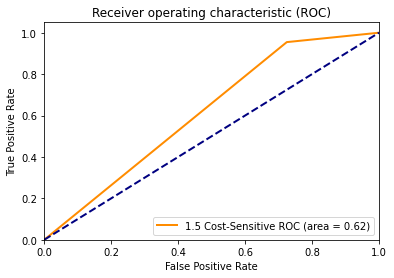

In [258]:
plot_roc(fpr,tpr,auc)

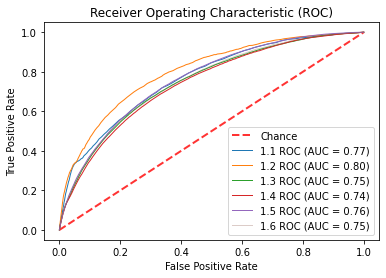

In [259]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver Operating Characteristic (ROC)")
ax.legend(loc="lower right")

# plot all results on one graph

# 1.1 wrapper method
plot_roc_curve(clf_1_1, X_1_1_classifier, y_1_1,name='1.1 ROC',lw=1, ax=ax)

# 1.2 embedded method
plot_roc_curve(clf_1_2, X_1_2_classifier, y_1_2,name='1.2 ROC',lw=1, ax=ax)

# 1.3 wrapper method + imputed data
plot_roc_curve(clf_1_3, X_1_3_classifier, y_1_3,name='1.3 ROC',lw=1, ax=ax)

# 1.4 embedded method + imputed data
plot_roc_curve(clf_1_4, X_1_4_classifier, y_1_4,name='1.4 ROC',lw=1, ax=ax)

# 1.5 cost-sensitive
plot_roc_curve(clf_1_5, X_1_5_classifier, y_1_5,name='1.5 ROC',lw=1, ax=ax)

# 1.6 weighted average
plot_roc_curve(clf_1_6, X_1_6_classifier, y_1_6,name='1.6 ROC',alpha=0.3, lw=1, ax=ax)

plt.show()

#### Performance Metric Table

In [260]:
#?? need something else besides this
#?? use weighted F1 or regular F1
df_results

,Section,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.845626,0.301990,0.959818,0.612204,0.867485,0.459429,0.354382,0.766171
1,2,Embedded,0.848994,0.290299,0.966350,0.644395,0.866351,0.446473,0.362053,0.800752
2,3,Wrapper Imputed,0.753824,0.170445,0.966371,0.648702,0.761757,0.289779,0.236975,0.748270
3,4,Embedded Imputed,0.752446,0.158527,0.968833,0.649509,0.759623,0.272470,0.228270,0.740902
4,5,Cost Sensitive Imputed,0.456801,0.954632,0.275423,0.324331,0.943384,0.427506,0.248172,0.760590
0,6,Weighted F1,0.758402,0.226402,0.952277,0.633849,0.771615,0.365613,0.269048,0.749974
